# Objekterkennung IntSys

In diesem Projekt sollen Objekte auf einem Drehteller mithilfe eines Ultraschall Sensors (HCSR04) erkannt werden.

Die gemessenen Daten befinden sich im Unterordner "messdaten"

### Primär orientieren wir uns an der digits-erkennen Übung, und benutzen sklearn

In [8]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Datenformat

Jede log-Datei in den Messdaten besteht aus 10 Umdrehungen.
Zum modellieren, wird die raw data 50/50 geteilt, und anschliessend vorbereitet

Messdateninfos:
Die Messdaten haben jeweils 61 Messpunkte/Umdrehung

In [41]:
directory = "messdaten/"

file = "logfile_deo_dose_53mm.txt"

df = pd.read_csv(directory + file, header=None)
print(df)

            0
0    5.051546
1    5.051546
2    5.051546
3    5.051546
4    6.030928
..        ...
605  5.051546
606  5.034364
607  5.051546
608  5.051546
609  5.051546

[610 rows x 1 columns]


In [48]:
def transform_data(df):
    """
    input 305 measurement points, > 5 turns * 61 measurements
    für jeden messpunkt einer drehung die nächsten 61 punkte anhängen
         > ACHTUNG!: nur wenn es 61 oder mehr messpunkte bis zum ende des input df gibt!

         > d.h. es gibt 305 - 61 = 244 output zeilen im df
    """
    # transpose from (n, 1) -> (1, n)
    df_transposed = df.T
    interval = np.arange(0, 61, 1)
    output_df = pd.DataFrame(interval)

    for i in range(244): # 244 because 305 - 61 (letzte Umdrehung wird rausgenommen, damit jeder neue teil eine komplette umdrehung hat)
        i1_turn = df_transposed.iloc[:, i:i+61]
        i2_turn = df_transposed.iloc[:, i+1:i+1+61]
        # print(i1_turn.shape)
        # print(i2_turn.shape)
        output_df = pd.concat([i1_turn, i2_turn])

    output_df.drop_duplicates()
    return output_df

# def label_data(df, label):
    # """ergänzt dataframe mit einer column, da steht welches objekt gemessen wurde
    # """
    # return df_labeled

df_new = transform_data(df)
print(df_new)





    0    1    2    3    4    5    6    7    8    9    ...       295       296  \
0   0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN       NaN   
1   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN       NaN   
2   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN       NaN   
3   3.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN       NaN   
4   4.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...       NaN       NaN   
..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...       ...   
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  5.051546  5.034364   
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  5.051546  5.034364   
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  5.051546  5.034364   
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  5.051546  5.034364   
0   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  5.051546  5.034364   

         297       298     

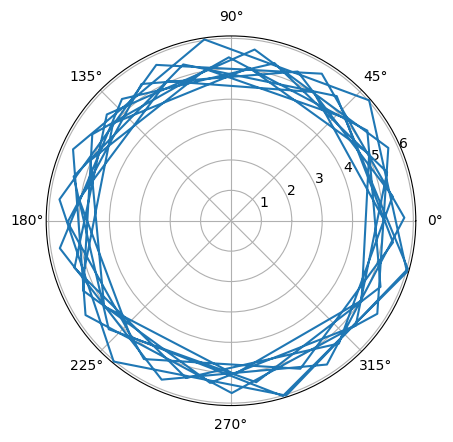

In [34]:


fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
interval = np.arange(0, 61, 1)
ax.plot(interval, df_new.T)
